In [1]:
from retinaface import RetinaFace
from deepface import DeepFace

import matplotlib.pyplot as plt
import cv2

import numpy as np
from utilpack.util import *
import os

import time

AttributeError: 'tuple' object has no attribute 'keys'

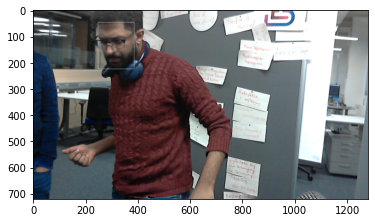

In [2]:
filename = 'video.mp4'
frames_per_second = 24.0
res = '720p'

# Set resolution for the video capture
# Function adapted from https://kirr.co/0l6qmh
def change_res(cap, width, height):
    cap.set(3, width)
    cap.set(4, height)

# Standard Video Dimensions Sizes
STD_DIMENSIONS =  {
    "480p": (640, 480),
    "720p": (1280, 720),
    "1080p": (1920, 1080),
    "4k": (3840, 2160),
}


# grab resolution dimensions and set video capture to it.
def get_dims(cap, res='720'):
    width, height = STD_DIMENSIONS["480p"]
    if res in STD_DIMENSIONS:
        width,height = STD_DIMENSIONS[res]
    ## change the current caputre device
    ## to the resulting resolution
    change_res(cap, width, height)
    return width, height

# Video Encoding, might require additional installs
# Types of Codes: http://www.fourcc.org/codecs.php
VIDEO_TYPE = {
    'avi': cv2.VideoWriter_fourcc(*'XVID'),
    #'mp4': cv2.VideoWriter_fourcc(*'H264'),
    'mp4': cv2.VideoWriter_fourcc(*'XVID'),
}

def get_video_type(filename):
    filename, ext = os.path.splitext(filename)
    if ext in VIDEO_TYPE:
      return  VIDEO_TYPE[ext]
    return VIDEO_TYPE['avi']

# FPS = 1/30
# FPS_MS = int(FPS * 1000)

cap = cv2.VideoCapture(0)
out = cv2.VideoWriter(filename, get_video_type(filename), 25, get_dims(cap, res))

while True:
    ret, frame = cap.read()
    out.write(frame)
    
    obj = RetinaFace.detect_faces(frame)
        
    for key in obj.keys():
        identity = obj[key]
        # print(identity)
        facial_area = identity["facial_area"]
        cv2.rectangle(frame, (facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,255),1)

    # plt.figure(figsize=(20,20))
    plt.imshow(frame[:,:,::-1])
    plt.show
    
    img_cv = cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
out.release()
cv2.destroyAllWindows()